In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("data/london_merged.csv")

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

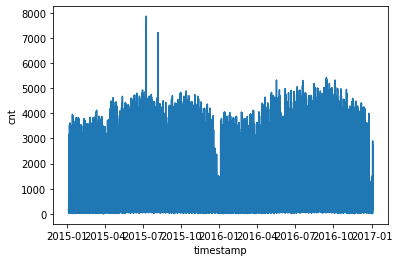

In [4]:
sns.lineplot(data=df,x='timestamp',y='cnt')

In [5]:
df.head(50)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


In [6]:
df.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


In [7]:
df.groupby('is_weekend').mean()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,season
is_weekend,,,,,,,,
0.0,1209.274831,12.486901,11.556413,72.070797,15.855794,2.660077,0.030858,1.491321
1.0,977.415694,12.420993,11.431757,72.961318,16.056455,2.879678,0.000000,1.493964


In [8]:
df.groupby('is_holiday').mean()

,cnt,t1,t2,hum,wind_speed,weather_code,is_weekend,season
is_holiday,,,,,,,,
0.0,1151.525191,12.503425,11.560619,72.256033,15.916153,2.718203,0.291838,1.497534
1.0,769.526042,10.901042,9.756510,75.381510,15.776042,2.924479,0.000000,1.250000
